In [39]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('../data/1day.csv')
df.columns = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'close_time']
df['open_time'] = pd.to_datetime(df['open_time'] * 1000, unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
df.head()

,open_time,open_price,high_price,low_price,close_price,volume,close_time
0,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2017-08-18 23:59:59.999
1,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,2017-08-19 23:59:59.999
2,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,2017-08-20 23:59:59.999
3,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,2017-08-21 23:59:59.999
4,2017-08-22,321.04,330.41,144.21,309.80,7956.35088,2017-08-22 23:59:59.999


In [41]:
df.isnull().sum()

open_time      0
open_price     0
high_price     0
low_price      0
close_price    0
volume         0
close_time     0
dtype: int64

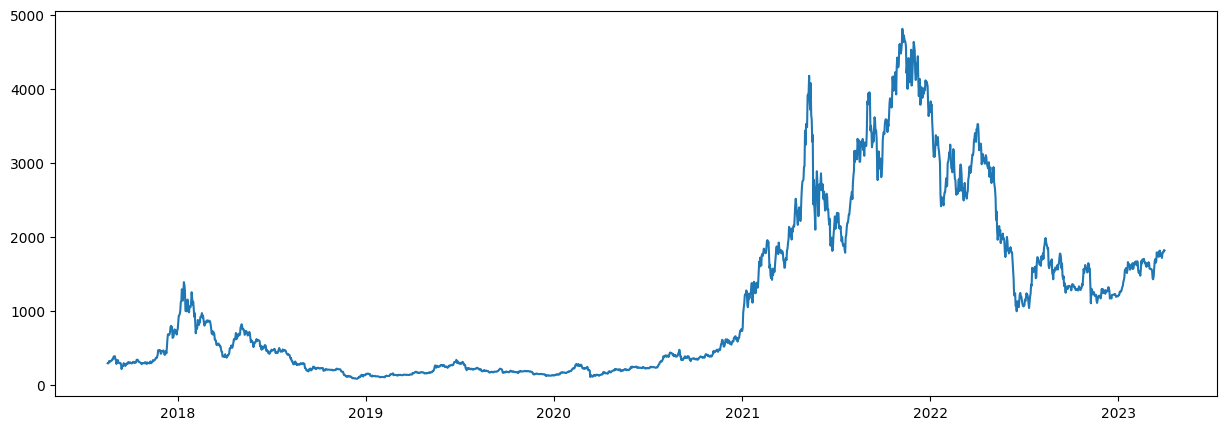

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(df['open_time'], df['close_price'])
plt.show()

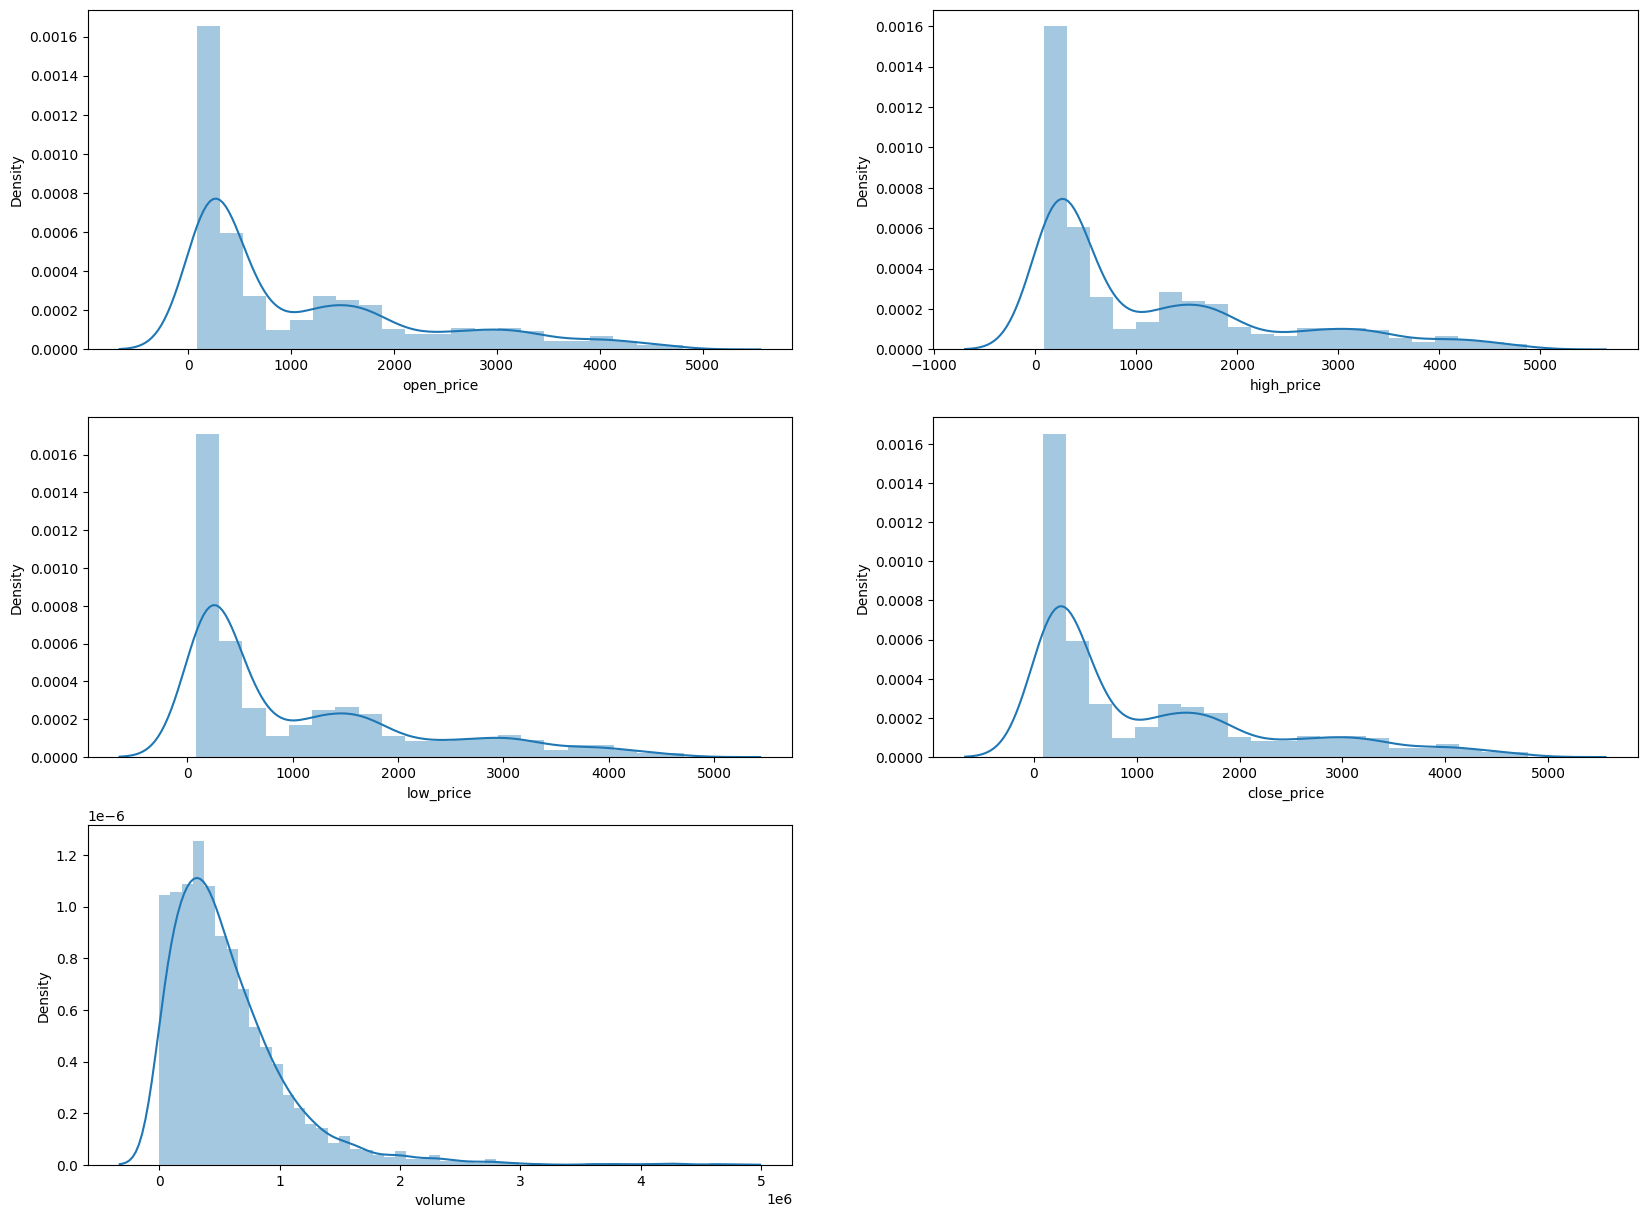

In [43]:
features = ['open_price', 'high_price', 'low_price', 'close_price', 'volume']

plt.subplots(figsize=(20, 15))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    # plt.plot(df[feature])
    sb.distplot(df[feature])


In [44]:
df['close_day'] = df['close_time'].dt.day
df['close_dayofweek'] = df['close_time'].dt.dayofweek
df['close_month'] = df['close_time'].dt.month
df['close_quarter'] = df['close_time'].dt.quarter
df['close_year'] = df['close_time'].dt.year

In [45]:
# df = df[df['close_year'] > 2020]
# df = df[df['close_year'] < 2023]

Text(0.5, 1.0, 'Close Price by Quarter')

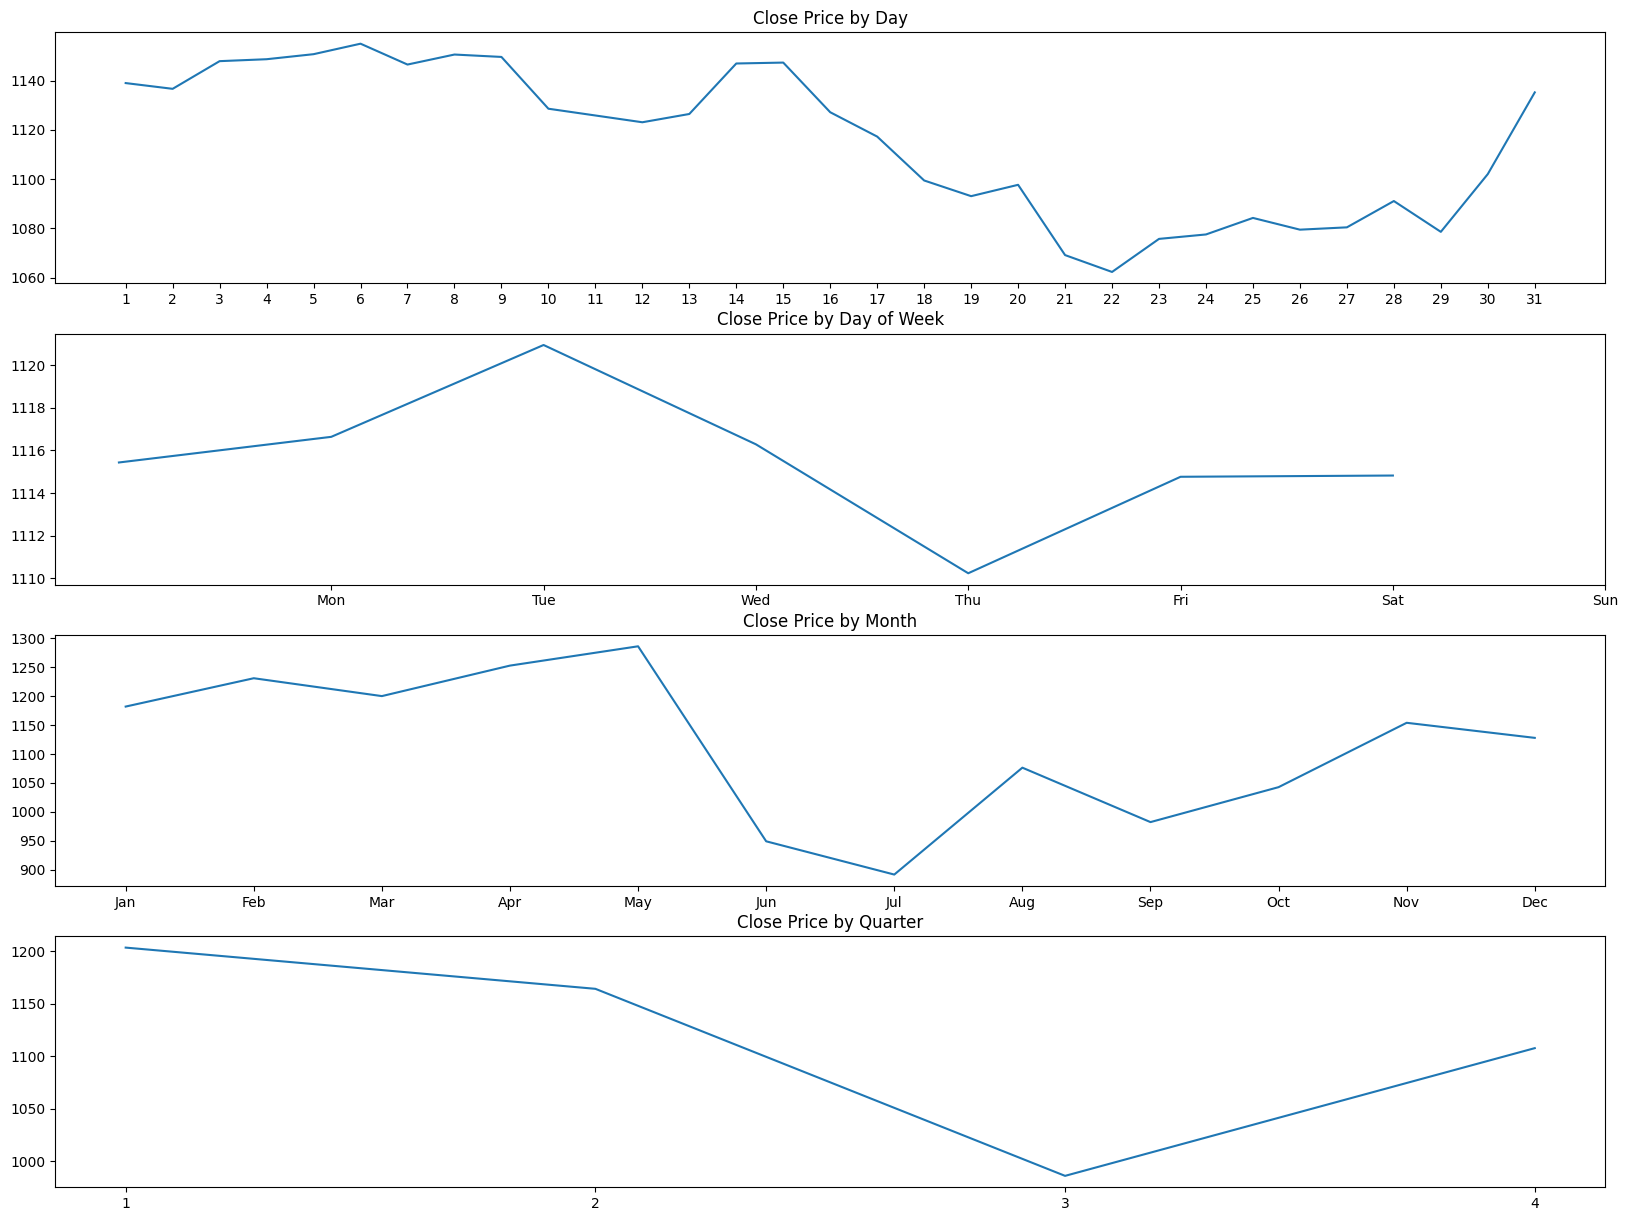

In [46]:
group_by_day = df.groupby('close_day').mean()
group_by_dayofweek = df.groupby('close_dayofweek').mean()
group_by_month = df.groupby('close_month').mean()
group_by_quarter = df.groupby('close_quarter').mean()
group_by_year = df.groupby('close_year').mean()

plt.subplots(4, 1, figsize=(20, 15))

plt.subplot(4, 1, 1)
plt.plot(group_by_day['close_price'])
plt.xticks(range(1, 32))
plt.title('Close Price by Day')

plt.subplot(4, 1, 2)
plt.plot(group_by_dayofweek['close_price'])
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Close Price by Day of Week')


plt.subplot(4, 1, 3)
plt.plot(group_by_month['close_price'])
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  

plt.title('Close Price by Month')

plt.subplot(4, 1, 4)
plt.plot(group_by_quarter['close_price'])
plt.xticks([1, 2, 3, 4])
plt.title('Close Price by Quarter')


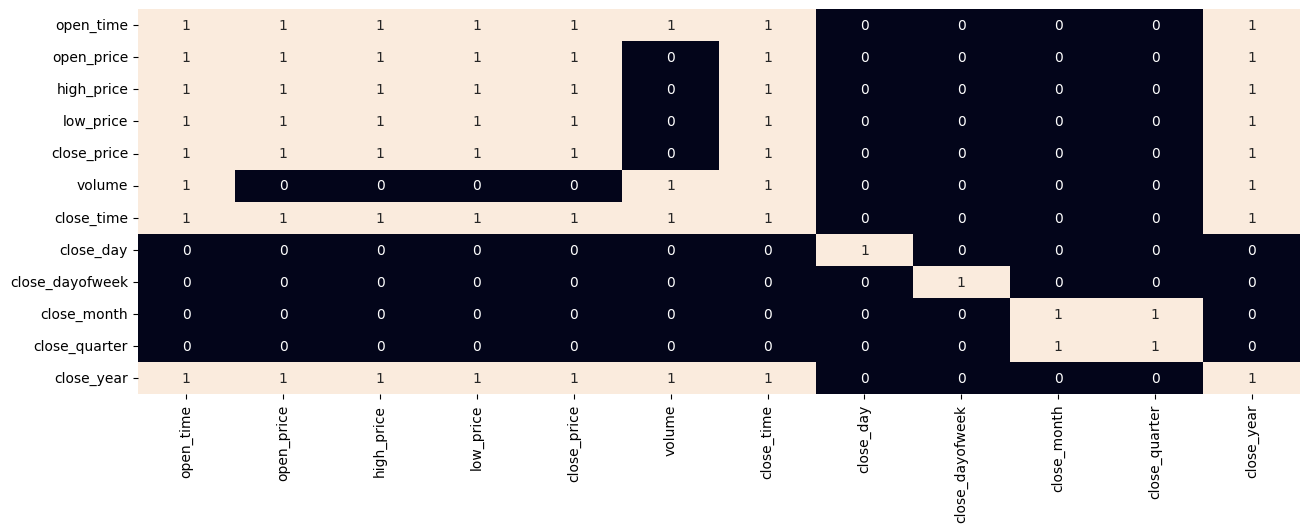

In [49]:
plt.figure(figsize=(15, 5))
sb.heatmap(df.corr() > 0.3, annot=True, cbar=False)
plt.show()